# Title of ML project:Air Quality Prediction

### Name:Fouziya-T

### Organization:Entri Elevate

## Overview of problem statement

This project revolves around predicting air pollutant concentrations to facilitate effective environmental management and safeguard public health.
By leveraging historical data on key air pollutants such as carbon monoxide (CO), benzene (C6H6), and nitrogen dioxide (NO2), alongside
environmental variables like temperature, relative humidity, and atmospheric pressure, the goal is to develop accurate predictive models.
These models, including Support Vector Regression (SVR), Random Forest Regression, and Linear Regression, are trained to estimate pollutant
concentrations based on the interplay of various factors.Through rigorous evaluation using metrics like Mean Absolute Error (MAE),
Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score, the performance of each model is assessed. Additionally,
hyperparameter tuning techniques such as Grid Search or Random Search are employed to optimize model parameters and enhance predictive accuracy.
Ultimately, the project aims to provide actionable insights for environmental agencies, policymakers, and urban planners to implement proactive
measures and mitigate air pollutions adverse impacts on public health and the environment, fostering sustainable environmental management 
and improving community well-being.

## Obective

The objective of this project is to develop robust predictive models for estimating air pollutant concentrations based on historical data
and environmental variables. By leveraging machine learning techniques such as Support Vector Regression (SVR), Random Forest Regression, 
and Linear Regression, the goal is to accurately predict pollutant levels, including carbon monoxide (CO), benzene (C6H6), and
nitrogen dioxide (NO2). These models will enable environmental agencies and policymakers to proactively monitor and manage air quality, 
mitigate pollution-related health risks, and implement targeted interventions to improve overall environmental sustainability and public
health outcomes.

## Data description

Source:kaggle;
Features:
1. Date
2. Time
3. CO(GT)
4. PT08.S1(CO)
5. NMHC(GT)
6. C6H6(GT)
7. PT08.S2(NMHC)
8. NOx(GT)
9. PT08.S3(NOx)
10. NO2(GT)
11. PT08.S4(NO2)
12. PT08.S5(03)
13. T
14. RH
15. AH

In [43]:
#  Importing necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install numpy
!pip install scikit-learn
!pip install joblib
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew,boxcox
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import joblib

## Data Collection

In [44]:
#  Loading the dataset
data_frame=pd.read_csv("C:\\Users\\Fouziya T\\Downloads\\archive\\AirQuality.csv",delimiter=';')
data_frame

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [45]:
#  Handling missing values
missing_values=data_frame.isnull().sum()
print("Missing_values:\n",missing_values)

Missing_values:
 Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [46]:
#  removing columns with complete null values
data_frame.dropna(axis=1,how='all',inplace=True)
#  removing rows with complete null values
data_frame.dropna(how='all',inplace=True)
# combining date and time column into a single datetime column
data_frame['DateTime']=pd.to_datetime(data_frame['Date'] + ' ' + data_frame['Time'],format='%d/%m/%Y %H.%M.%S')
# drop the original Date and Time column
data_frame.drop(["Date","Time"],axis=1,inplace=True)
# Make Datetime as the first column
Datetime_column=data_frame.pop('DateTime')
data_frame.insert(0,'DateTime',Datetime_column)
                               

data_frame

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,2005-04-04 11:00:00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,2005-04-04 12:00:00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,2005-04-04 13:00:00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [47]:
# Check datatypes
print("Data Types :\n",data_frame.dtypes)

Data Types :
 DateTime         datetime64[ns]
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
dtype: object


In [48]:
# Remove commas from the values in object columns and conver to numeric 
numeric_columns=['CO(GT)','C6H6(GT)','T','RH','AH']
for col in numeric_columns:
    data_frame[col]=data_frame[col].str.replace(',','').astype(float)

In [49]:
# datatypes after conversion
print("Data Types after conversion :\n",data_frame.dtypes)

Data Types after conversion :
 DateTime         datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


## Exploratory Data Analysis(EDA)

In [50]:
# Summary statistics
data_frame.describe()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 16:00:00,-36.996687,1048.990061,-159.090093,18.656834,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,168.190232,465.260981,9846.342524
min,2004-03-10 18:00:00,-2000.000000,-200.000000,-200.000000,-2000.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 05:00:00,4.000000,921.000000,-200.000000,40.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,109.000000,341.000000,6923.000000
50%,2004-09-21 16:00:00,14.000000,1053.000000,-200.000000,79.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,172.000000,486.000000,9768.000000
75%,2004-12-28 03:00:00,25.000000,1221.000000,-200.000000,136.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000
max,2005-04-04 14:00:00,119.000000,2040.000000,1189.000000,637.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,446.000000,887.000000,22310.000000
std,NaN,211.793927,329.832710,139.789093,413.802064,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,114.081191,216.407635,4447.196714


<Figure size 1200x800 with 0 Axes>

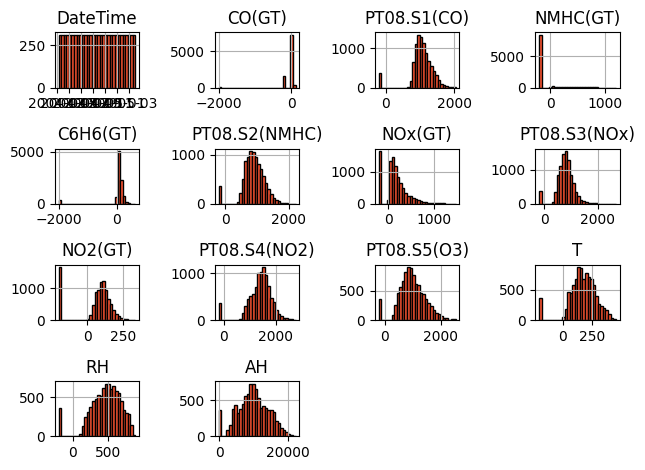

In [51]:
# plotting histograms
plt.figure(figsize=(12,8))
data_frame.hist(bins=30,edgecolor='k',color='#FF5733')
plt.tight_layout()
plt.show()

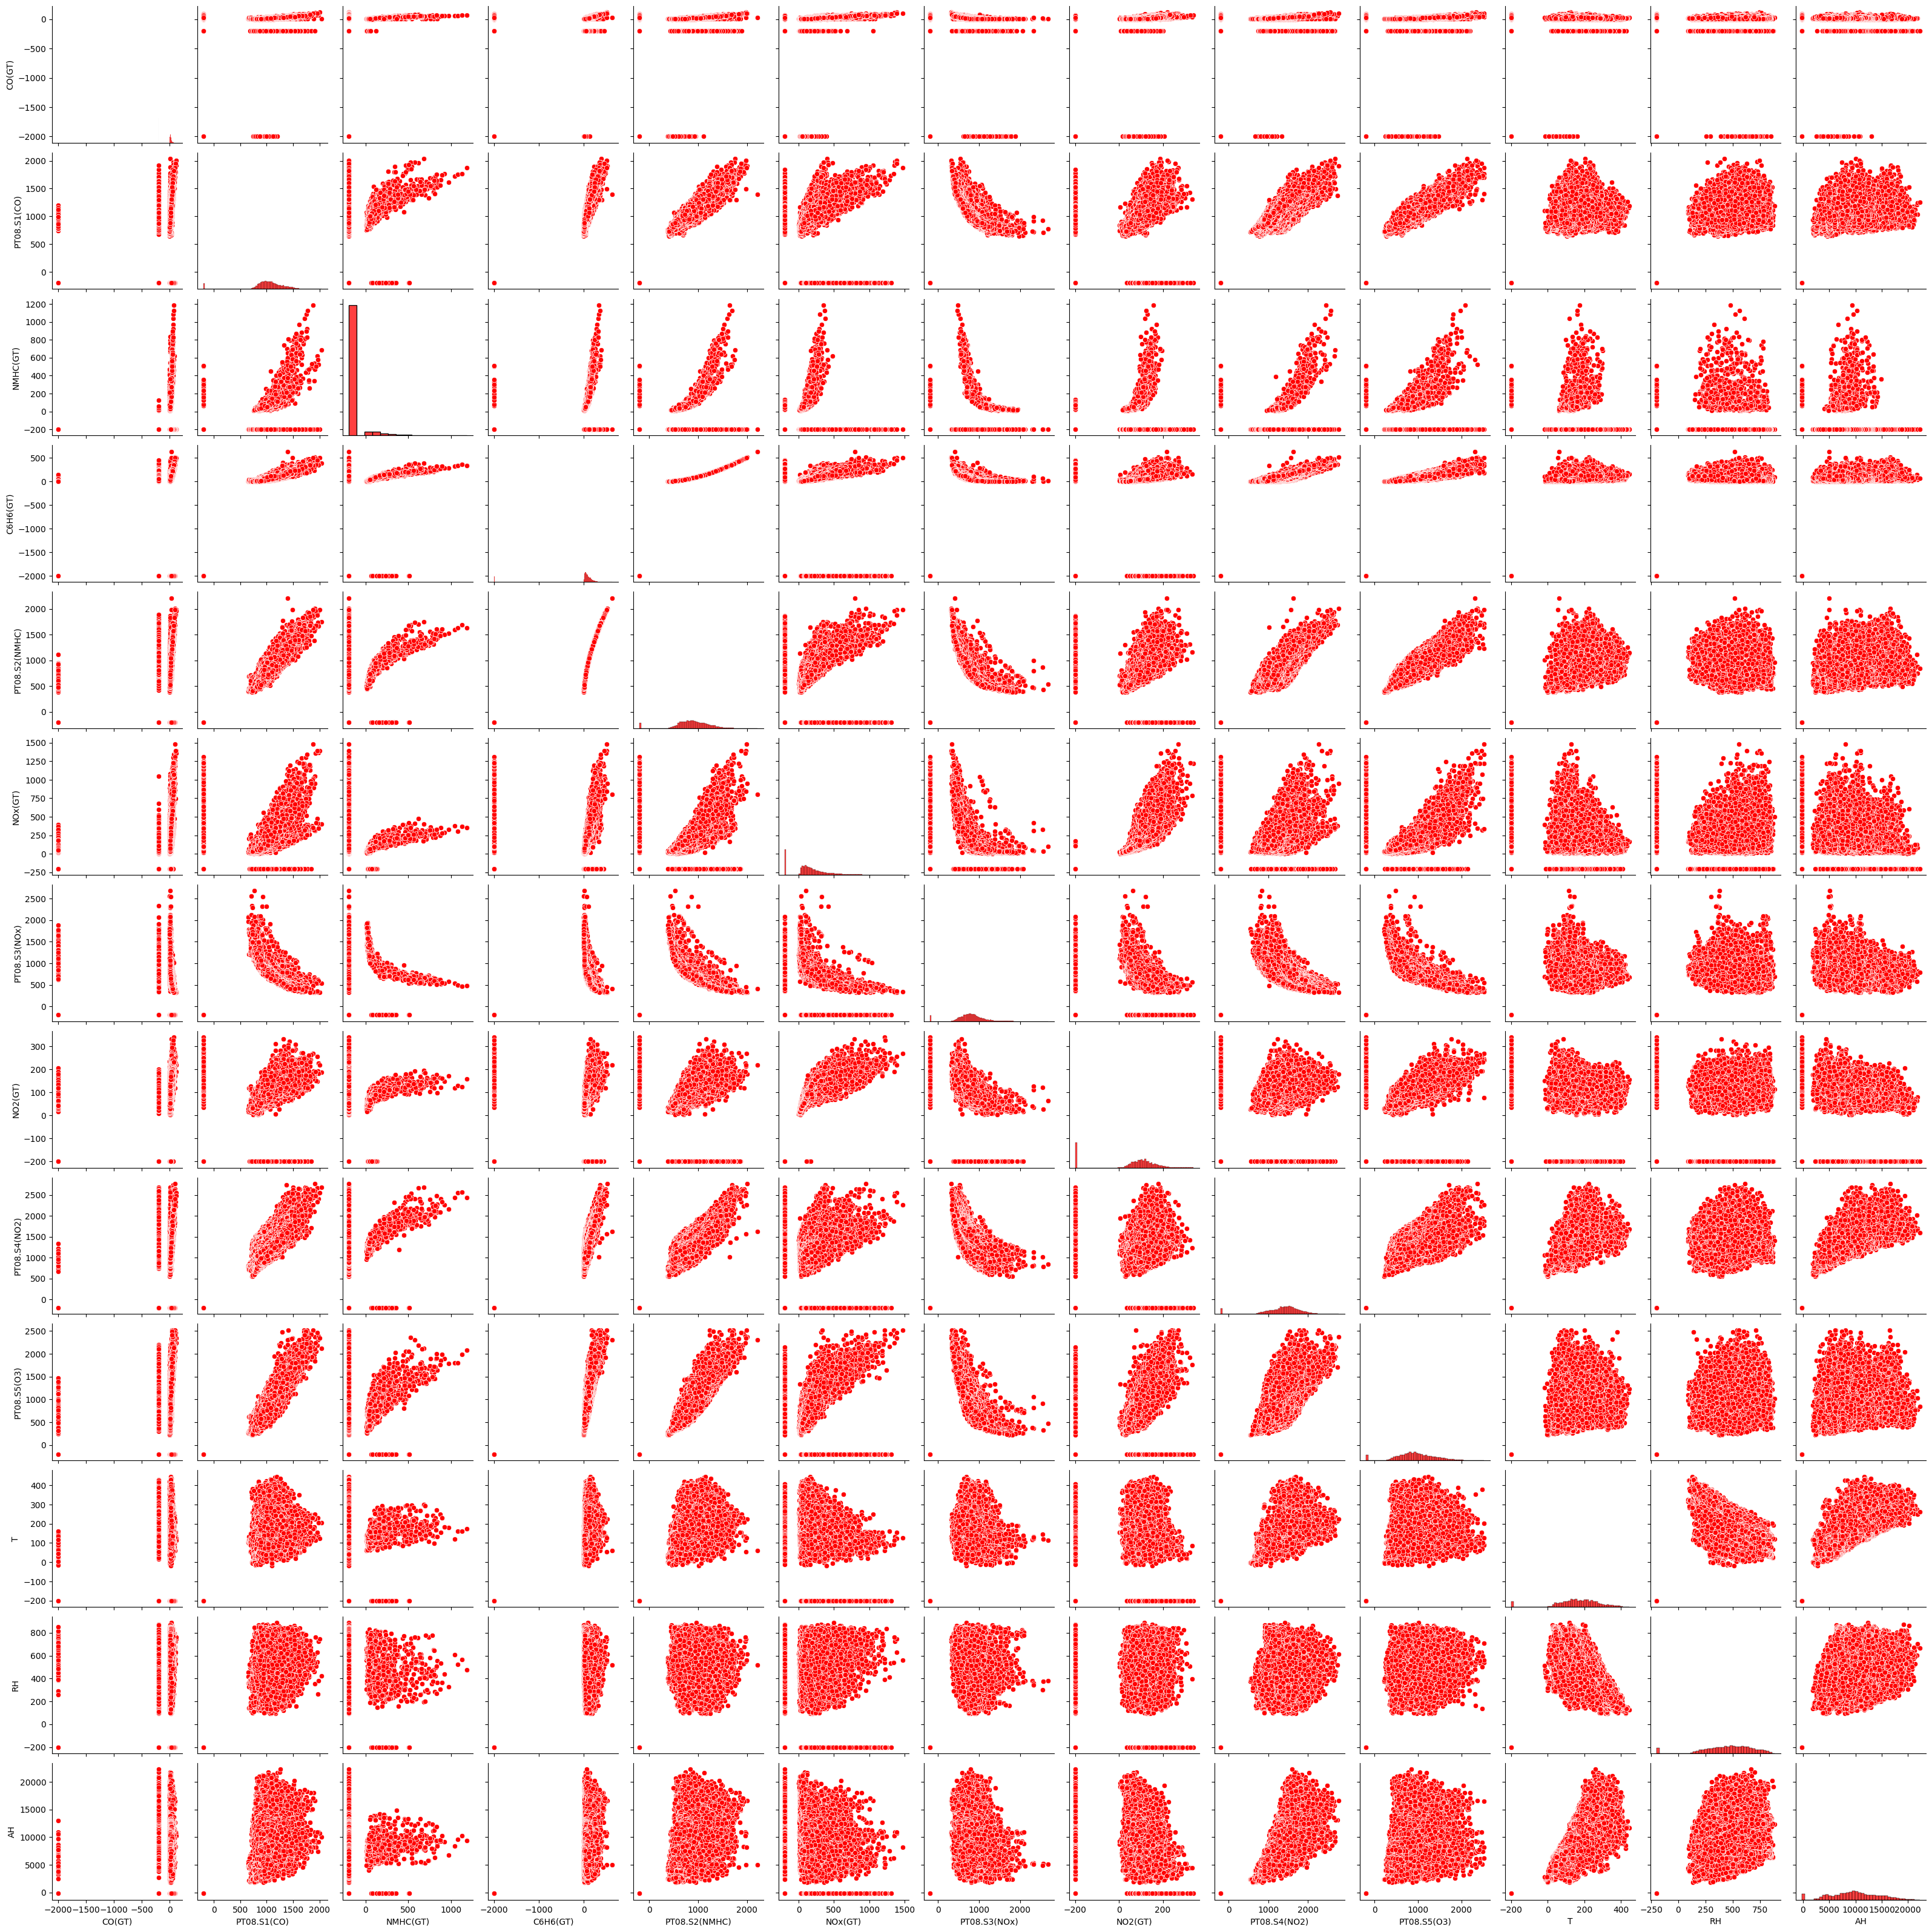

In [52]:
# Plotting pairplot
custom_palette=["red"]*len(data_frame.columns)
sns.set_palette(custom_palette)
sns.pairplot(data_frame)
plt.show()

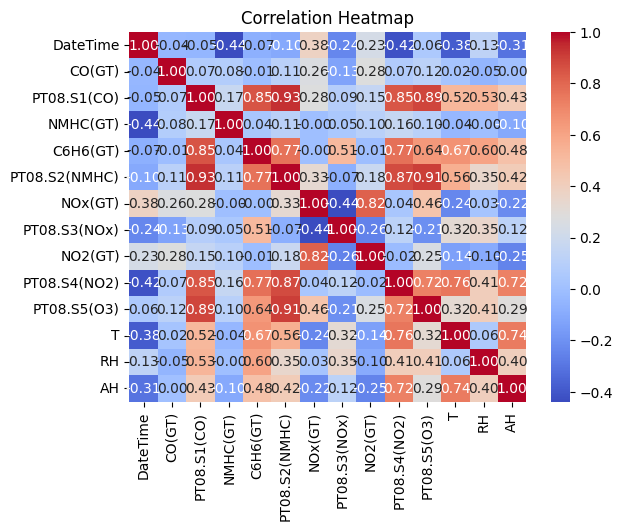

In [53]:
# Creating a correlation heatmap
corr_matrix=data_frame.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

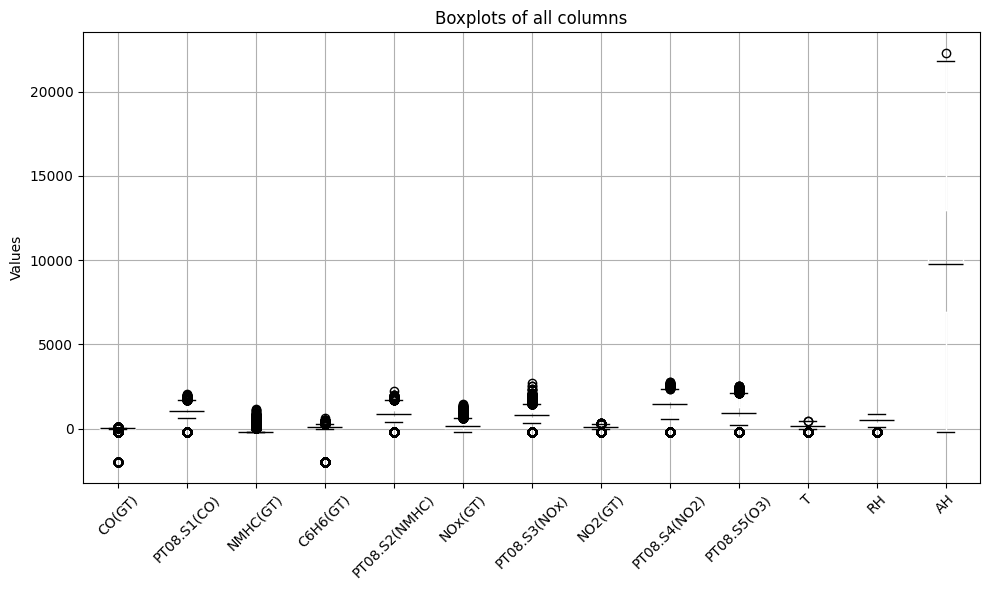

In [54]:
# Box plot of pollutants by season
plt.figure(figsize=(10,6))
data_frame.boxplot(rot=45)
plt.title('Boxplots of all columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [55]:
# Outlier detection and removal
# Specifying columns for outlier detection
pollutant_columns=['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)',
                   'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
# Dictionary to store outlier indices for each column
outlier_indices={}
# Iterate over each pollutant column and detect outliers using IQR method
for column in pollutant_columns:
    Q1=data_frame[column].quantile(0.25)
    Q3=data_frame[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data_frame[(data_frame[column]<lower_bound)|(data_frame[column]>upper_bound)]
    outlier_indices[column]=outliers.index
# Print oulier indice for each column
for column,indices in outlier_indices.items():
    print(f"Outliers in column '{column}':{indices}")


Outliers in column 'CO(GT)':Index([  10,   25,   26,   34,   39,   50,   58,   82,   98,  106,
       ...
       9058, 9073, 9074, 9097, 9098, 9121, 9130, 9202, 9274, 9346],
      dtype='int64', length=1887)
Outliers in column 'PT08.S1(CO)':Index([  25,   50,   53,   97,   98,  110,  111,  112,  120,  121,
       ...
       8139, 8140, 8141, 8142, 8143, 8777, 8882, 9097, 9098, 9121],
      dtype='int64', length=484)
Outliers in column 'NMHC(GT)':Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230],
      dtype='int64', length=914)
Outliers in column 'C6H6(GT)':Index([  50,  111,  120,  121,  122,  159,  169,  170,  183,  207,
       ...
       8857, 8858, 8881, 8882, 9015, 9025, 9073, 9074, 9097, 9098],
      dtype='int64', length=606)
Outliers in column 'PT08.S2(NMHC)':Index([ 111,  121,  169,  524,  525,  526,  701,  702,  703,  704,
       ...
       8106, 8107, 8108, 8109, 8110, 8111, 8112, 

In [56]:
pollutant_columns=['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)',
                   'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
def remove_outliers(data_frame, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    data_frame = data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]
    
    return data_frame





In [57]:
for column in pollutant_columns:
    data_frame = remove_outliers(data_frame, column)

data_frame.to_csv('cleaned_dataset.csv',index=False)

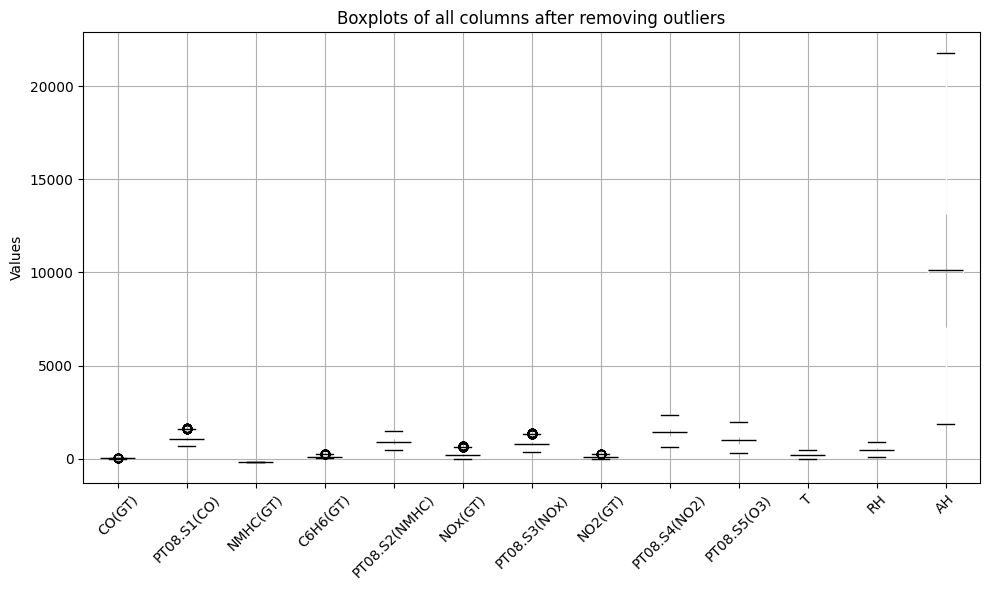

In [58]:
# Box plot of pollutants by season
plt.figure(figsize=(10,6))
data_frame.boxplot(rot=45)
plt.title('Boxplots of all columns after removing outliers')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [59]:
# Skewness detection and transformation
# Specify the pollutant columns
pollutant_columns=['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)',
                   'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
# Dictionary to store skewness value for each column
skewness={}

# Dictionary to store skewness value for each column
skewness = {}

# Iterate over each pollutant column and detect skewness
for column in pollutant_columns:
    # Detect skewness
    if data_frame[column].nunique() > 1:
        skewness[column] = skew(data_frame[column])

# Print skewness values for each column
for column, value in skewness.items():
    print(f"Skewness of column '{column}': {value}")

# Apply Box-Cox transformation if skewness is above a threshold
for column, value in skewness.items():
    if abs(value) > 0.5:
        transformed_values, _ = boxcox(data_frame[column] + 1)
        data_frame[column] = transformed_values

# Save the transformed dataset
data_frame.to_csv('transformed_dataset.csv', index=False)



Skewness of column 'CO(GT)': 0.6334264715524055
Skewness of column 'PT08.S1(CO)': 0.479993719464297
Skewness of column 'C6H6(GT)': 0.7741966477625576
Skewness of column 'PT08.S2(NMHC)': 0.27008312195887796
Skewness of column 'NOx(GT)': 0.8849996984885724
Skewness of column 'PT08.S3(NOx)': 0.4489264587871606
Skewness of column 'NO2(GT)': 0.3288208360304201
Skewness of column 'PT08.S4(NO2)': 0.012284318850770862
Skewness of column 'PT08.S5(O3)': 0.3242087328308135
Skewness of column 'T': 0.24132327775899987
Skewness of column 'RH': 0.029057810499731135
Skewness of column 'AH': 0.18956348034249174


<Figure size 1000x600 with 0 Axes>

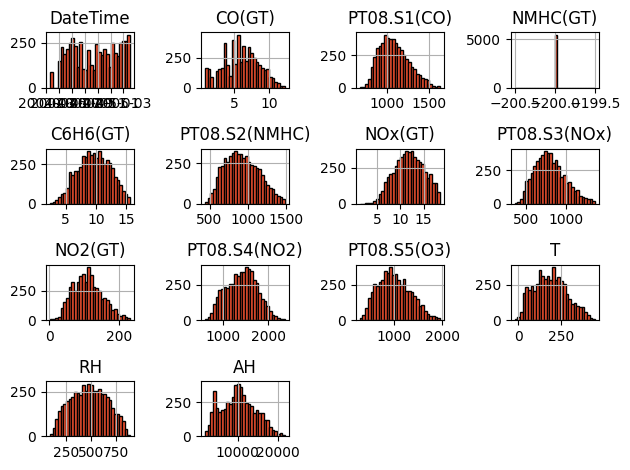

In [60]:
# Histogram plot after skewness transformation
plt.figure(figsize=(10,6))
data_frame.hist(bins=30,edgecolor='k',color='#FF5733')
plt.tight_layout()
plt.show()

## Split data ino training and testing set

In [61]:
# Split data into training and testing set
# Define target column and feature columns
target_column='CO(GT)'
feature_columns=['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)',
                   'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
# Separate the features and target
X=data_frame[feature_columns]
Y=data_frame[target_column]
# Split the data into training and testing set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Feature selection

In [62]:
# Feature selection using random forest
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,Y_train)
importances = rf.feature_importances_
indices = importances.argsort()[-5:][::-1]  # Select top 5 features
# Get selected feature columns using random forest
selected_features_rf=X_train.columns[indices]
X_train_selected_rf=X_train[selected_features_rf]
X_test_selected_rf=X_test[selected_features_rf]

In [63]:
print("Selected features by Random Forest:",selected_features_rf)

Selected features by Random Forest: Index(['PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S5(O3)', 'PT08.S1(CO)', 'C6H6(GT)'], dtype='object')


In [64]:
# SelectKBest feature selection
selector=SelectKBest(score_func=f_regression,k=5)
selector.fit(X_train,Y_train)
selected_features_skb=X_train.columns[selector.get_support()]
print("Selected features by SelectKBest:",selected_features_skb)

Selected features by SelectKBest: Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S5(O3)'],
      dtype='object')


In [65]:
# Transform data to include only selected features
X_train_skb=X_train[selected_features_skb]
X_test_skb=X_test[selected_features_skb]

In [66]:
# Save the datasets with selected features
X_train_selected_rf.to_csv('X_train_selected_rf.csv',index=False)
X_test_selected_rf.to_csv('X_test_selected_rf.csv',index=False)
X_train_skb.to_csv('X_train_skb.csv',index=False)
X_test_skb.to_csv('X_test_skb.csv',index=False)


## Feature scaling


In [67]:
# Scaling(Min-Max Scaling)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [68]:
# Sandardization (Z-score Normalization)
standardizer=StandardScaler()
X_train_standardized=standardizer.fit_transform(X_train)
X_test_standardized=standardizer.transform(X_test)

In [69]:
# Converting scaled and standardized data back to dataframe
scaled_df=pd.DataFrame(X_train_scaled,columns=feature_columns)
standardized_df=pd.DataFrame(X_train_standardized,columns=feature_columns)

In [70]:
print("Scaled DataFrame (Min-Max Scaling):")
print(scaled_df.head())

Scaled DataFrame (Min-Max Scaling):
   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0     0.316842       0.0  0.398337       0.302415  0.330482      0.506958   
1     0.157895       0.0  0.328674       0.239614  0.354274      0.995030   
2     0.285263       0.0  0.370833       0.276329  0.599233      0.500000   
3     0.454737       0.0  0.742322       0.667633  0.534452      0.320080   
4     0.394737       0.0  0.509564       0.411594  0.563785      0.393638   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0  0.228070      0.540295     0.163658  0.627957  0.459119  0.745215  
1  0.258772      0.391033     0.125150  0.632258  0.171069  0.329482  
2  0.495614      0.197503     0.205776  0.251613  0.438994  0.179004  
3  0.543860      0.647560     0.440433  0.924731  0.091824  0.559144  
4  0.285088      0.463110     0.354392  0.574194  0.486792  0.668403  


In [71]:
print("Sandardized DataFrame (Z-score Normalization):")
print(standardized_df.head())

Sandardized DataFrame (Z-score Normalization):
   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0    -0.537720       0.0 -0.682895      -0.733683 -1.537335      0.339247   
1    -1.410857       0.0 -1.023396      -1.032225 -1.408972      2.907153   
2    -0.711191       0.0 -0.817332      -0.857693 -0.087372      0.302637   
3     0.219770       0.0  0.998437       1.002453 -0.436875     -0.643984   
4    -0.109825       0.0 -0.139242      -0.214680 -0.278619     -0.256967   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0 -1.252902      0.454708    -1.331317  0.930507 -0.130750  1.443117  
1 -1.088300     -0.340796    -1.525103  0.951843 -1.416026 -0.460698  
2  0.181488     -1.372229    -1.119364 -0.936450 -0.220551 -1.149795  
3  0.440148      1.026381     0.061520  2.402736 -1.769617  0.591018  
4 -0.947212      0.043344    -0.371470  0.663799 -0.007273  1.091363  


## Build the ML model

In [72]:
# Initialize and train models
# Support Vector Regressor(SVR)
svr=SVR()
svr.fit(X_train_scaled,Y_train)
y_pred_svr=svr.predict(X_test_scaled)


In [73]:
# Random Forest Regressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,Y_train)
y_pred_rf=rf.predict(X_test_scaled)


In [74]:
# Linear Regression
lr=LinearRegression()
lr.fit(X_train_scaled,Y_train)
y_pred_lr=lr.predict(X_test_scaled)


## Model evaluation

In [75]:
# Using MSE
mse_svr=mean_squared_error(Y_test,y_pred_svr)
print(f'SVR MSE :{mse_svr}')
mse_rf=mean_squared_error(Y_test,y_pred_rf)
print(f"Random Forest Regressor MSE :{mse_rf}")
mse_lr=mean_squared_error(Y_test,y_pred_lr)
print(f"Linear Regression MSE:{mse_lr}")

SVR MSE :2.1713710949364713
Random Forest Regressor MSE :2.075176796492726
Linear Regression MSE:2.1916016649956656


In [76]:
# Using r2-score
r2_svr=r2_score(Y_test,y_pred_svr)
r2_rf=r2_score(Y_test,y_pred_rf)
r2_lr=r2_score(Y_test,y_pred_lr)
print(f"SVR Model-R^2 Score:{r2_svr:.2f}")
print(f"Random Forest Model-R^2 Score:{r2_rf:.2f}")
print(f"Linear Regression Model-R^2 Score:{r2_lr:.2f}")

SVR Model-R^2 Score:0.67
Random Forest Model-R^2 Score:0.68
Linear Regression Model-R^2 Score:0.66


## Hyperparameter tuning

In [77]:
print('hi')

hi


In [78]:
# Drop the datetime column
if 'datetime' in data_frame.columns:
    data_frame.drop(columns=['datetime'], inplace=True)

# Assuming 'CO(GT)' is the target column and the rest are features
X = data_frame.drop(columns=['CO(GT)'])
y = data_frame['CO(GT)']

# Verify and convert all columns to numeric types if necessary
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())  # Handle missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
### Hyperparameter Tuning
# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regression', RandomForestRegressor(random_state=42))
])

In [80]:
# Define the parameter grid
param_grid = {
    'feature_selection__k': [5, 10, 'all'],  # Select 5, 10, or all features
    'regression__n_estimators': [50, 100],  # Number of trees in the forest
    'regression__max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
}


In [81]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)



Best Parameters: {'feature_selection__k': 'all', 'regression__max_features': 'sqrt', 'regression__n_estimators': 100}


In [82]:
### Train and Evaluate the Best Model
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest with SelectKBest - MSE: {mse}, RMSE: {rmse}, R2: {r2}")


Random Forest with SelectKBest - MSE: 2.0428284838465727, RMSE: 1.4292755101262222, R2: 0.6874011376591592


## Save the model

In [83]:
# Save all three models
joblib.dump(svr,'svr_model.pkl')
joblib.dump(rf,'rf_model.pkl')
joblib.dump(lr,'lr_model.pkl')
print("All models saved successfully")

All models saved successfully


In [84]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and save the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler.pkl')

# Split the test data to create unseen data
X_test, X_unseen, y_test, y_unseen = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Load the saved scaler
scaler = joblib.load('scaler.pkl')
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen)

# Ensure the features are consistent
assert X_train_scaled.shape[1] == X_test_scaled.shape[1] == X_unseen_scaled.shape[1], "Feature count mismatch!"
# Train the models on the scaled training data
svr = SVR()
svr.fit(X_train_scaled, y_train)
joblib.dump(svr, 'svr_model.pkl')

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
joblib.dump(rf, 'rf_model.pkl')

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
joblib.dump(lr, 'lr_model.pkl')

# Load models
svr = joblib.load('svr_model.pkl')
rf = joblib.load('rf_model.pkl')
lr = joblib.load('lr_model.pkl')
# Predict and evaluate on unseen data
models = {
    'Support Vector Regression': svr,
    'Random Forest Regression': rf,
    'Linear Regression': lr
}

for model_name, model in models.items():
    y_pred = model.predict(X_unseen_scaled)
    print(f"Evaluating {model_name}")
    print(f"R2 Score: {r2_score(y_unseen, y_pred)}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_unseen, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_unseen, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_unseen, y_pred))}\n")

Evaluating Support Vector Regression
R2 Score: 0.7083098399654038
Mean Absolute Error (MAE): 0.7185048130570754
Mean Squared Error (MSE): 1.9112439413781919
Root Mean Squared Error (RMSE): 1.3824774650525744

Evaluating Random Forest Regression
R2 Score: 0.7260201877589506
Mean Absolute Error (MAE): 0.8548101234516559
Mean Squared Error (MSE): 1.7952002773886269
Root Mean Squared Error (RMSE): 1.3398508414702834

Evaluating Linear Regression
R2 Score: 0.7050695998829252
Mean Absolute Error (MAE): 0.894393073867812
Mean Squared Error (MSE): 1.9324749943061117
Root Mean Squared Error (RMSE): 1.3901348834937248



## Interpretation of Results(Conclusion)

The developed models—Support Vector Regressor (SVR), Random Forest Regressor (RF), and Linear Regressor (LR)—showed varying performance in predicting air quality. Among them, the Random Forest Regressor demonstrated the highest R² score, indicating it was the most effective in capturing the variance in air quality data. However, several limitations were identified: the dataset may have missing or noisy data, important features might be missing, and air quality can vary significantly over time and space. Addressing these limitations through improved data collection, exploring additional features, and considering temporal and spatial variations can enhance model performance and reliability.